### Implimentation

### The dataset has credit card transactions where our objective is to identify the fraudulent transaction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] =8,8

In [4]:
# Reading the dataset
data = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\creditcard.csv")

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# checking the shape of our data
data.shape

(284807, 31)

<AxesSubplot:>

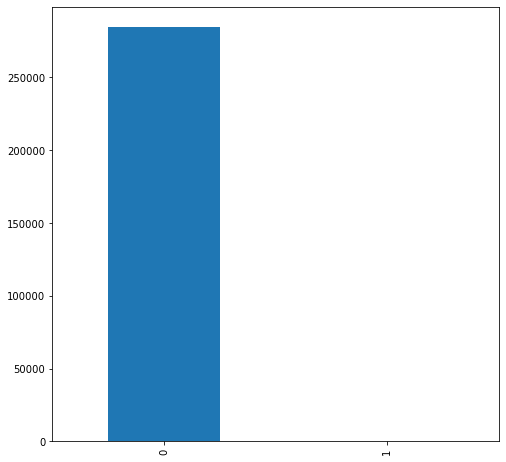

In [10]:
# checking the distribution of two classes in the target variable
data.Class.value_counts().plot(kind='bar')

### clearly the dataset is havily imbalanced!

In [11]:
# creating the dataset with all independent variable
X= data.iloc[:,:-1]

# creating the dataset with all dependent variable
y= data.iloc[:,-1]


 - Split the dataset into train and test using stratified sampling on our dependent variable 
 - Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets 

In [14]:
# splitting the dataset into the Training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [15]:
print("the shape of train dataset :")
print(X_train.shape)

print("\the shape of train dataset :")
print(X_train.shape)


the shape of train dataset :
(227845, 30)
	he shape of train dataset :
(227845, 30)


In [19]:
# Hyperparameter tuning

classifierl = RandomForestClassifier() 
# For GBM,use GradientBoostingClassifier()
grid_values = {'n_estimators' :[10,20], 'max_depth' :[3,5]}
classifier = GridSearchCV(classifierl, param_grid = grid_values, scoring = 'roc_auc' , cv=5)

# Fit the object to train dataset
model=classifier.fit(X_train , y_train)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [10, 20]},
             scoring='roc_auc')

### Predicting on both train and test using the fitted model

In [20]:
train_preds = classifier.predict(X_train)
test_preds = classifier.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,train_preds))

[[227433     18]
 [    88    306]]


In [29]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds)

0.9995347714455002

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,test_preds))

[[56861     3]
 [   35    63]]


In [22]:
# Obtain accuracy on test set
accuracy_score(y_test,test_preds)


0.9993328885923949

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.94      0.78      0.85       394

    accuracy                           1.00    227845
   macro avg       0.97      0.89      0.93    227845
weighted avg       1.00      1.00      1.00    227845



In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.64      0.77        98

    accuracy                           1.00     56962
   macro avg       0.98      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



**Accuracy is not a good metric to evalute our model since the dataset is heavily imbalanced**

plot the variable importance

In [35]:
feature = X_train.columns
importances = classifier.best_estimator_.feature_importances_
## if best_estimator not chosen so you will face error
indices = np.argsort(importances)

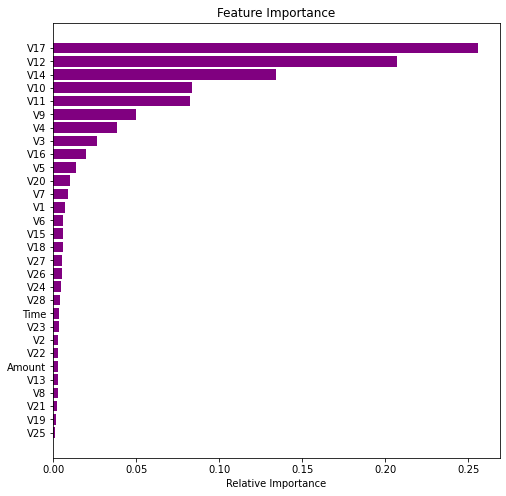

In [37]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices],color='purple', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()